# Funcion de Distribucion de probabilidades 

## Distribucion Uniforme

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100631.,  99236., 100276., 100383.,  99580., 100205., 100184.,
         99894.,  99327., 100284.]),
 array([ 1.00021945, 10.90019463, 20.80016981, 30.70014499, 40.60012018,
        50.50009536, 60.40007054, 70.30004572, 80.2000209 , 90.09999608,
        99.99997126]),
 <BarContainer object of 10 artists>)

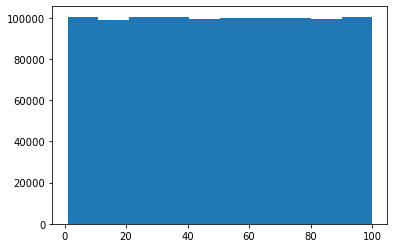

In [3]:
%matplotlib inline
plt.hist(data)

### Distribución Normal

In [8]:
data = np.random.randn(1000000)

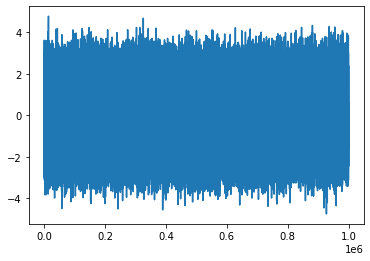

In [9]:
x = range(1, 1000001)
plt.plot(x, data)

(array([7.30000e+01, 2.12400e+03, 2.68100e+04, 1.43429e+05, 3.30584e+05,
        3.28132e+05, 1.40788e+05, 2.59580e+04, 2.03400e+03, 6.80000e+01]),
 array([-4.75469199, -3.80206138, -2.84943077, -1.89680016, -0.94416956,
         0.00846105,  0.96109166,  1.91372227,  2.86635288,  3.81898349,
         4.7716141 ]),
 <BarContainer object of 10 artists>)

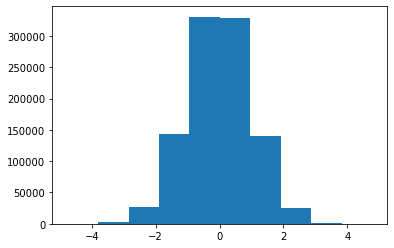

In [10]:
plt.hist(data)

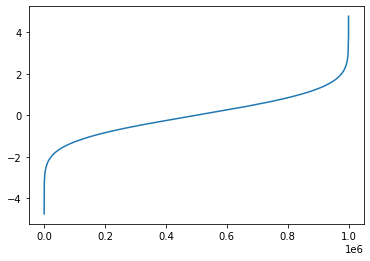

In [11]:
plt.plot(x, sorted(data))

(array([2.000e+00, 2.800e+01, 2.680e+02, 1.185e+03, 2.603e+03, 3.163e+03,
        1.976e+03, 6.450e+02, 1.200e+02, 1.000e+01]),
 array([-5.46194758, -3.38449618, -1.30704477,  0.77040663,  2.84785804,
         4.92530944,  7.00276085,  9.08021225, 11.15766366, 13.23511507,
        15.31256647]),
 <BarContainer object of 10 artists>)

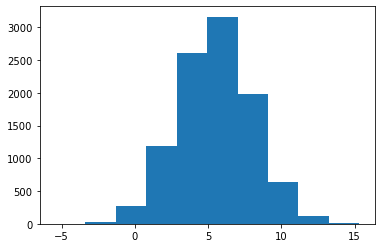

In [13]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd*Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd = Z
plt.hist(data)

In [14]:
data = np.random.randn(2,4)
data

array([[ 0.18227833, -0.78129096, -0.0521895 ,  0.80899824],
       [-0.23782797,  1.44617796,  2.01861933, -0.88465228]])

### La simulación de Monte Carlo

* Generamos los números aleatorio uniforme x e y entre 0 y 1 con un total de 1000 veces
* Calculamos x * x + y * y
    * Si el valor es inferior a 1 -> Entonces estamos dentro del círculo
    * Si el valor es superior a 1 -> Entonces estamos fuera del círculo
* Calculamos el numero total de veces que están dentro del circulo y lo dividimos entre el numero total de intentos para obtener
una aproximación de la probilidad de caer dentro del círculo
* Usamos dicha probilidad para aprovechar el valor pi
* Repetimos el experimento un numero suficiente de veces(por ejemplo 100), para obtener diferentes (100) aproximaciones de pi.
* Calculamos el promedio de 1000 experimentos anteriores para dar un valor final de pi.

In [24]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z =  np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1423880000000004


(3.1423880000000004, [<matplotlib.lines.Line2D at 0x2331ab84e50>])

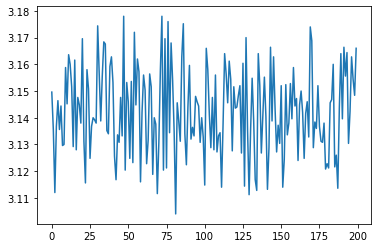

In [25]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [29]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5*np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [33]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001174,1.503499,18.497396
std,1.001190,2.501229,7.785913
min,-5.024288,-11.056546,5.000013
25%,-0.676422,-0.183519,11.753903
50%,-0.000900,1.503859,18.489528
75%,0.674867,3.191088,25.240828
max,4.667621,14.159253,31.999941


(array([2.80000e+01, 9.88000e+02, 1.63650e+04, 1.08696e+05, 3.03574e+05,
        3.55676e+05, 1.75437e+05, 3.60370e+04, 3.08100e+03, 1.18000e+02]),
 array([-5.02428813, -4.05509719, -3.08590626, -2.11671533, -1.14752439,
        -0.17833346,  0.79085747,  1.7600484 ,  2.72923934,  3.69843027,
         4.6676212 ]),
 <BarContainer object of 10 artists>)

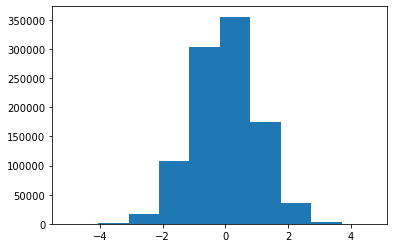

In [34]:
plt.hist(data["A"])

(array([2.70000e+01, 1.26100e+03, 2.17150e+04, 1.38412e+05, 3.46257e+05,
        3.40243e+05, 1.31014e+05, 1.98720e+04, 1.17100e+03, 2.80000e+01]),
 array([-11.05654562,  -8.53496576,  -6.01338591,  -3.49180605,
         -0.97022619,   1.55135367,   4.07293353,   6.59451338,
          9.11609324,  11.6376731 ,  14.15925296]),
 <BarContainer object of 10 artists>)

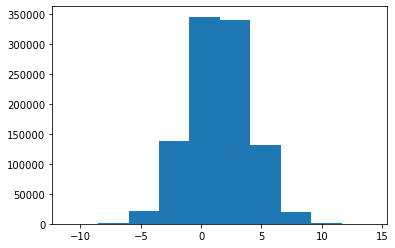

In [35]:
plt.hist(data["B"])

(array([ 99319., 100004., 100452., 100416., 100212., 100386.,  99773.,
         99754., 100035.,  99649.]),
 array([ 5.0000134 ,  7.7000062 , 10.39999901, 13.09999182, 15.79998463,
        18.49997744, 21.19997025, 23.89996306, 26.59995587, 29.29994868,
        31.99994149]),
 <BarContainer object of 10 artists>)

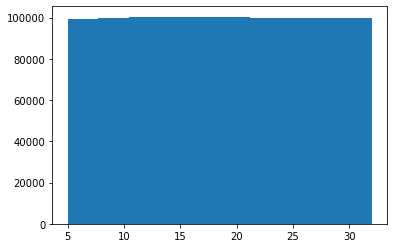

In [36]:
plt.hist(data["C"])

In [37]:
urldata = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt" 

In [38]:
data = pd.read_csv(urldata)

In [39]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [41]:
column_names = data.columns.values.tolist()

In [42]:
a = len(column_names)
a

21

In [47]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    },  index = range(42, 42+a)
)

In [48]:
new_data

,Column Name,A,B
42,State,-0.836527,0.930207
43,Account Length,-2.089376,0.085401
44,Area Code,1.365676,0.273281
45,Phone,-0.728644,0.526727
46,Int'l Plan,0.197618,0.505584
47,VMail Plan,2.023988,0.845089
48,VMail Message,0.639011,0.121461
49,Day Mins,1.536430,0.740121
50,Day Calls,0.132586,0.922940
51,Day Charge,-0.139315,0.892564
